In [178]:
import numpy as np   
from sklearn import svm
from sklearn.svm import SVC
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("vehicle.csv")

In [64]:
data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [ ]:
#DATA PREPROCESSING

In [5]:
data.shape

(846, 19)

In [8]:
#We can see the dependent or target column as the last column in the dataset which is 'class'.
#Other columns are the attributes/features of the vehicles.
#Every row is the information for any one of the 3 vehicle classes taken from an angle.
#There are 18 attributes or independent variables.
#Vehicle class i.e. the dependent variable: 'bus', 'van', 'car'

In [9]:
data.dtypes
#All the independent attributes are numerical in nature.

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [21]:
#Check for MISSING values in the attributes.
data.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [26]:
#We see some counts of missing values in some columns ('circularity', 'distance_circularity', 'radius_ratio', 'pr.axis_aspect_ratio', 'scatter_ratio', 'elongatedness', 'pr.axis_rectangularity', 'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1', 'skewness_about.1', 'skewness_about.2').
#By using describe() function, we can check for the deviations or tails for all the numerical attributes and see if we can replace the missing values with the median or not.
data.describe().transpose()
#As we see the mean and median for the attributes are similar, we can have our missing values replaced with the median of the respective column.

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [27]:
#Replace every '?' value with np.nan if there.
data = data.replace('?', np.nan)

In [28]:
#Check the medians for the attributes.
data.median()

compactness                     93.0
circularity                     44.0
distance_circularity            80.0
radius_ratio                   167.0
pr.axis_aspect_ratio            61.0
max.length_aspect_ratio          8.0
scatter_ratio                  157.0
elongatedness                   43.0
pr.axis_rectangularity          20.0
max.length_rectangularity      146.0
scaled_variance                179.0
scaled_variance.1              363.5
scaled_radius_of_gyration      173.5
scaled_radius_of_gyration.1     71.5
skewness_about                   6.0
skewness_about.1                11.0
skewness_about.2               188.0
hollows_ratio                  197.0
dtype: float64

In [46]:
#Separate dataframe into independent variables and target variable as X and Y.
X = data.values[:,:18]  ## Features
Y = data.values[:,18]  ## Target

In [68]:
#Using lambda function to replace MISSING value with the median for every attribute of the dataframe in a loop.
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)
filler = lambda a: a.fillna(a.median())
X = X.apply(filler,axis=0)
#To check count of rows for every attribute, we use count function in this cell.
X.count()

In [74]:
#Bivariate Analysis

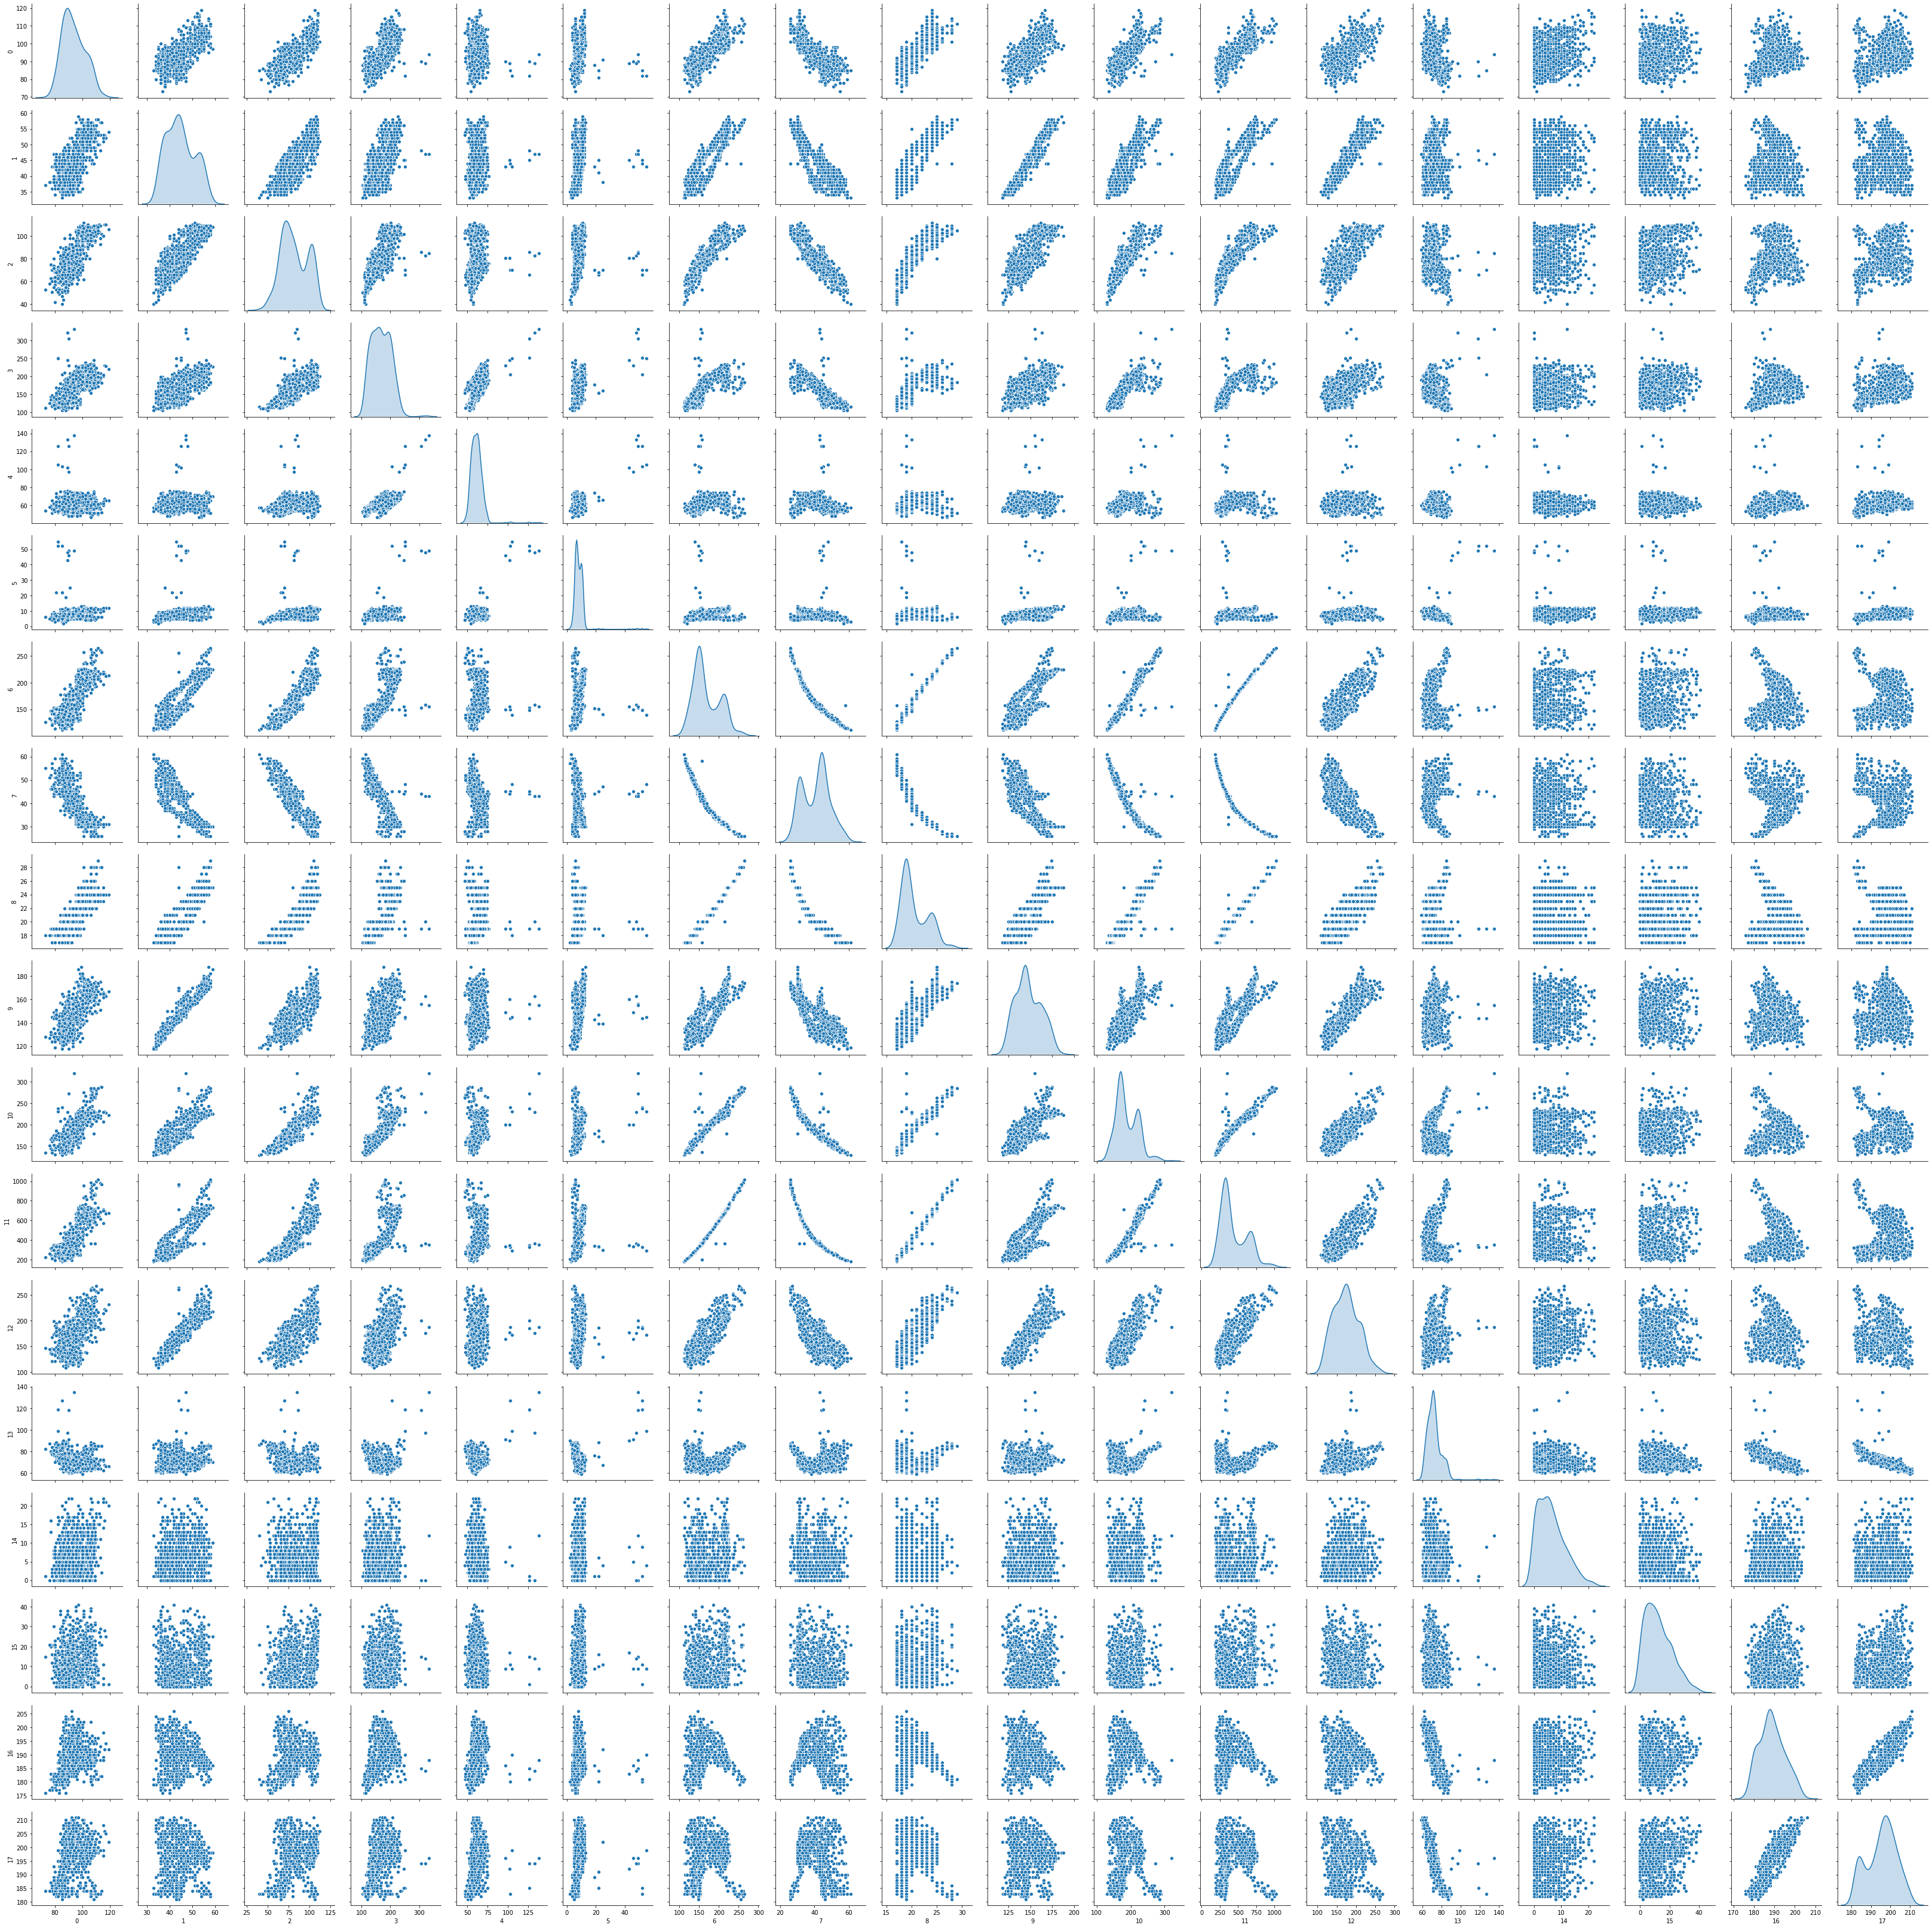

In [72]:
#Pairplot Analysis
sns.pairplot(X, diag_kind='kde')

In [154]:
#Using Box Plot for the attributes, also checking for any outliers.

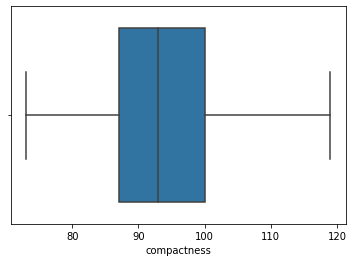

In [79]:
sns.boxplot(data['compactness'])

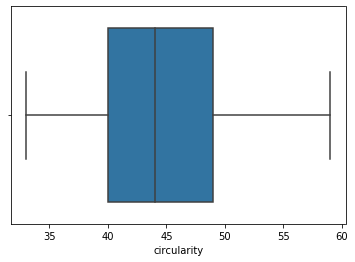

In [80]:
sns.boxplot(data['circularity'])

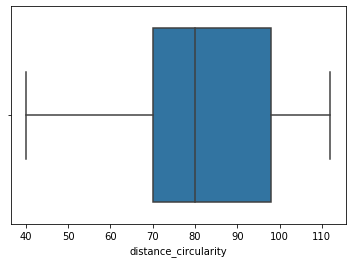

In [81]:
sns.boxplot(data['distance_circularity'])

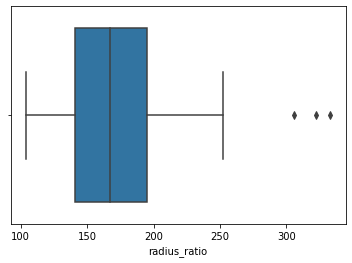

In [82]:
sns.boxplot(data['radius_ratio'])

In [84]:
data['radius_ratio'].describe()

count    840.000000
mean     168.888095
std       33.520198
min      104.000000
25%      141.000000
50%      167.000000
75%      195.000000
max      333.000000
Name: radius_ratio, dtype: float64

In [122]:
#We see 3 outliers in 'radius_ratio' column.
#for index, row in data.iterrows():
    #print(row['radius_ratio'])

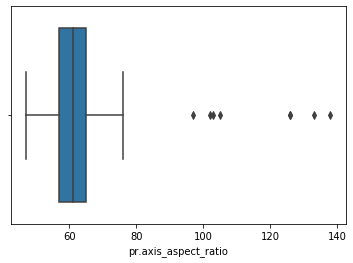

In [86]:
sns.boxplot(data['pr.axis_aspect_ratio'])

In [87]:
data['pr.axis_aspect_ratio'].describe()

count    844.000000
mean      61.678910
std        7.891463
min       47.000000
25%       57.000000
50%       61.000000
75%       65.000000
max      138.000000
Name: pr.axis_aspect_ratio, dtype: float64

In [88]:
#We see 7 outliers in 'pr.axis_aspect_ratio' column.

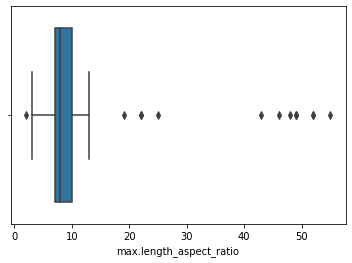

In [89]:
sns.boxplot(data['max.length_aspect_ratio'])

In [90]:
data['max.length_aspect_ratio'].describe()

count    846.000000
mean       8.567376
std        4.601217
min        2.000000
25%        7.000000
50%        8.000000
75%       10.000000
max       55.000000
Name: max.length_aspect_ratio, dtype: float64

In [91]:
#We see 9 outliers in 'max.length_aspect_ratio' column.

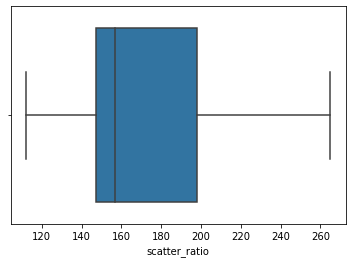

In [92]:
sns.boxplot(data['scatter_ratio'])

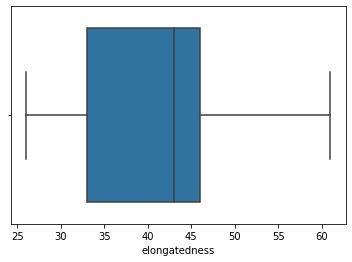

In [93]:
sns.boxplot(data['elongatedness'])

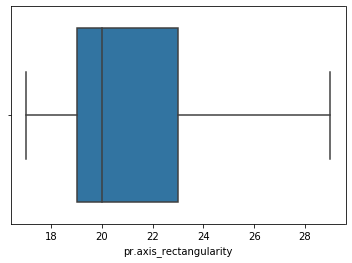

In [94]:
sns.boxplot(data['pr.axis_rectangularity'])

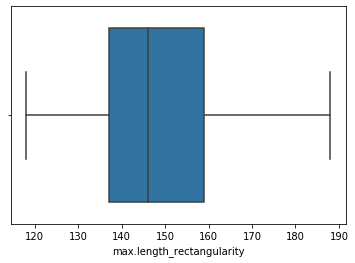

In [95]:
sns.boxplot(data['max.length_rectangularity'])

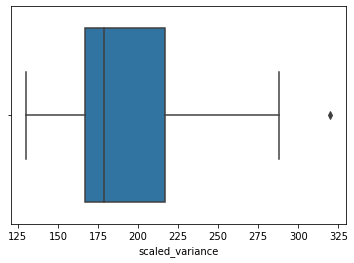

In [96]:
sns.boxplot(data['scaled_variance'])

In [97]:
data['scaled_variance'].describe()

count    843.000000
mean     188.631079
std       31.411004
min      130.000000
25%      167.000000
50%      179.000000
75%      217.000000
max      320.000000
Name: scaled_variance, dtype: float64

In [98]:
#We see 1 outlier in 'scaled_variance' column.

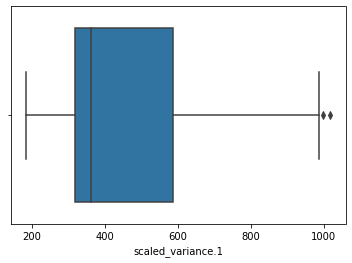

In [99]:
sns.boxplot(data['scaled_variance.1'])

In [100]:
data['scaled_variance.1'].describe()

count     844.000000
mean      439.494076
std       176.666903
min       184.000000
25%       318.000000
50%       363.500000
75%       587.000000
max      1018.000000
Name: scaled_variance.1, dtype: float64

In [101]:
#We see 2 outliers in 'scaled_variance.1' column.

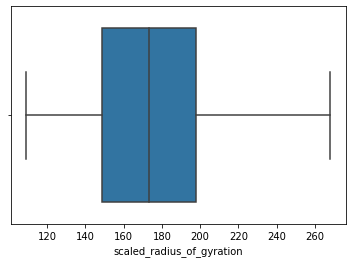

In [102]:
sns.boxplot(data['scaled_radius_of_gyration'])

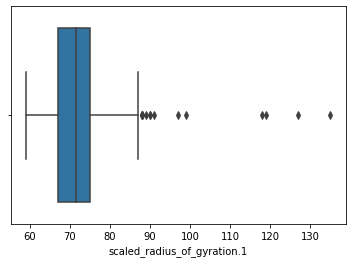

In [103]:
sns.boxplot(data['scaled_radius_of_gyration.1'])

In [104]:
data['scaled_radius_of_gyration.1'].describe()

count    842.000000
mean      72.447743
std        7.486190
min       59.000000
25%       67.000000
50%       71.500000
75%       75.000000
max      135.000000
Name: scaled_radius_of_gyration.1, dtype: float64

In [105]:
#We see 10 outliers in 'scaled_radius_of_gyration.1' column.

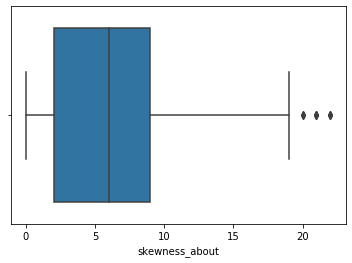

In [106]:
sns.boxplot(data['skewness_about'])

In [109]:
data['skewness_about'].describe()

count    840.000000
mean       6.364286
std        4.920649
min        0.000000
25%        2.000000
50%        6.000000
75%        9.000000
max       22.000000
Name: skewness_about, dtype: float64

In [110]:
#We see 3 outliers in 'skewness_about' column.

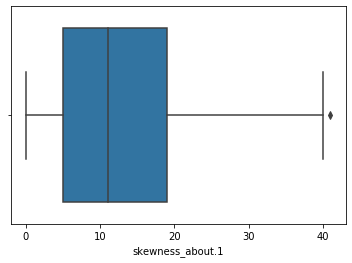

In [111]:
sns.boxplot(data['skewness_about.1'])

In [112]:
data['skewness_about.1'].describe()

count    845.000000
mean      12.602367
std        8.936081
min        0.000000
25%        5.000000
50%       11.000000
75%       19.000000
max       41.000000
Name: skewness_about.1, dtype: float64

In [113]:
#We see 1 outlier in 'skewness_about.1' column.

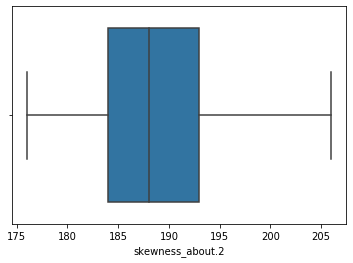

In [114]:
sns.boxplot(data['skewness_about.2'])

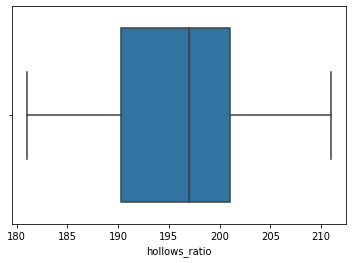

In [115]:
sns.boxplot(data['hollows_ratio'])

In [123]:
#Ther are a total of 36 outliers from all the columns.
#(36/846)*100 = 4.25%
#As these outliers may provide some value to the data, we keep the outliers.

In [125]:
#All the attributes are important for the model building, so keeping all the attributes.

In [127]:
#Applying z score to scale the values.
XScaled=X.apply(zscore)
XScaled.head()

0         1         2         3         4         5         6   \
0  0.160580  0.518073  0.057177  0.273363  1.310398  0.311542 -0.207598   
1 -0.325470 -0.623732  0.120741 -0.835032 -0.593753  0.094079 -0.599423   
2  1.254193  0.844303  1.519141  1.202018  0.548738  0.311542  1.148719   
3 -0.082445 -0.623732 -0.006386 -0.295813  0.167907  0.094079 -0.750125   
4 -1.054545 -0.134387 -0.769150  1.082192  5.245643  9.444962 -0.599423   

         7         8         9         10        11        12        13  \
0  0.136262 -0.224342  0.758332 -0.401920 -0.341934  0.285705 -0.327326   
1  0.520519 -0.610886 -0.344578 -0.593357 -0.619724 -0.513630 -0.059384   
2 -1.144597  0.935290  0.689401  1.097671  1.109379  1.392477  0.074587   
3  0.648605 -0.610886 -0.344578 -0.912419 -0.738777 -1.466683 -1.265121   
4  0.520519 -0.610886 -0.275646  1.671982 -0.648070  0.408680  7.309005   

         14        15        16        17  
0 -0.073812  0.380870 -0.312012  0.183957  
1  0.538390  0.156798  0.013265  0.452977  
2  1.558727 -0.403383 -0.149374  0.049447  
3 -0.073812 -0.291347  1.639649  1.529056  
4  0.538390 -0.179311 -1.450481 -1.699181

In [128]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.69055952  0.09164265  0.14842463
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.6216467   0.15396023  0.25176438
   0.8489411  -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.76794246  0.15864319  0.26499957
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625]
 [ 0.69055952  0.6216467   0.76794246  1.00118343  0.66423242  0.45058426
   0.73529816 -0.79041561  0.70922371  0.56962256  0.79435372  0.71928618
   0.53700678 -0.18061084  0.04877032  0.17394649  0.38266622  0.47186659]
 [ 0.09164265  0.15396023  0.15864319  0.66423242  1.00118343  0.64949139
   0.10385472 -0.18325156  0.07969

In [155]:
#Using n_components = 18
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [156]:
#The eigen values
print(pca.explained_variance_)

[9.40460261e+00 3.01492206e+00 1.90352502e+00 1.17993747e+00
 9.17260633e-01 5.39992629e-01 3.58870118e-01 2.21932456e-01
 1.60608597e-01 9.18572234e-02 6.64994118e-02 4.66005994e-02
 3.57947189e-02 2.74120657e-02 2.05792871e-02 1.79166314e-02
 1.00257898e-02 2.96445743e-03]


In [157]:
#The eigen vectors
print(pca.components_)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074211e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008427e-02 -4.26053415e-02
   3.27257119e-02  3.14147277e-02 -9.

In [158]:
#Percentage of variation explained by each eigen Vector.
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


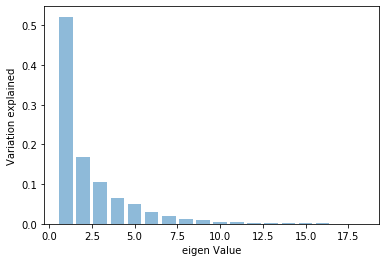

In [163]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

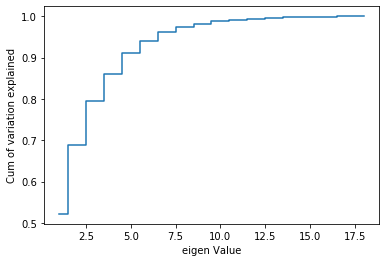

In [164]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

In [165]:
#Dimensionality Reduction

In [166]:
#We take 6 as the number of dimensions as we see it covers 95% of the variation.

In [167]:
pca2 = PCA(n_components=6)
pca2.fit(XScaled)
print(pca2.components_)
print(pca2.explained_variance_ratio_)
Xpca2 = pca2.transform(XScaled)

[[ 2.75283688e-01  2.93258469e-01  3.04609128e-01  2.67606877e-01
   8.05039890e-02  9.72756855e-02  3.17092750e-01 -3.14133155e-01
   3.13959064e-01  2.82830900e-01  3.09280359e-01  3.13788457e-01
   2.72047492e-01 -2.08137692e-02  4.14555082e-02  5.82250207e-02
   3.02795063e-02  7.41453913e-02]
 [-1.26953763e-01  1.25576727e-01 -7.29516436e-02 -1.89634378e-01
  -1.22174860e-01  1.07482875e-02  4.81181371e-02  1.27498515e-02
   5.99352482e-02  1.16220532e-01  6.22806229e-02  5.37843596e-02
   2.09233172e-01  4.88525148e-01 -5.50899716e-02 -1.24085090e-01
  -5.40914775e-01 -5.40354258e-01]
 [-1.19922479e-01 -2.48205467e-02 -5.60143254e-02  2.75074210e-01
   6.42012966e-01  5.91801304e-01 -9.76283108e-02  5.76484384e-02
  -1.09512416e-01 -1.70641987e-02  5.63239801e-02 -1.08840729e-01
  -3.14636493e-02  2.86277015e-01 -1.15679354e-01 -7.52828901e-02
   8.73592034e-03  3.95242743e-02]
 [ 7.83843562e-02  1.87337408e-01 -7.12008426e-02 -4.26053414e-02
   3.27257119e-02  3.14147277e-02 -9.

In [168]:
Xpca2

array([[ 3.34162030e-01, -2.19026358e-01,  1.00158417e+00,
         1.76612370e-01,  7.93007079e-02, -7.57446693e-01],
       [-1.59171085e+00, -4.20602982e-01, -3.69033854e-01,
         2.33234117e-01,  6.93948582e-01, -5.17161832e-01],
       [ 3.76932418e+00,  1.95282752e-01,  8.78587404e-02,
         1.20221219e+00,  7.31732265e-01,  7.05041037e-01],
       ...,
       [ 4.80917387e+00, -1.24931049e-03,  5.32333105e-01,
         2.95652324e-01, -1.34423636e+00, -2.17069763e-01],
       [-3.29409242e+00, -1.00827615e+00, -3.57003198e-01,
        -1.93367514e+00,  4.27680053e-02, -4.02491279e-01],
       [-4.76505347e+00,  3.34899728e-01, -5.68136078e-01,
        -1.22480708e+00, -5.40510366e-02, -3.35637137e-01]])

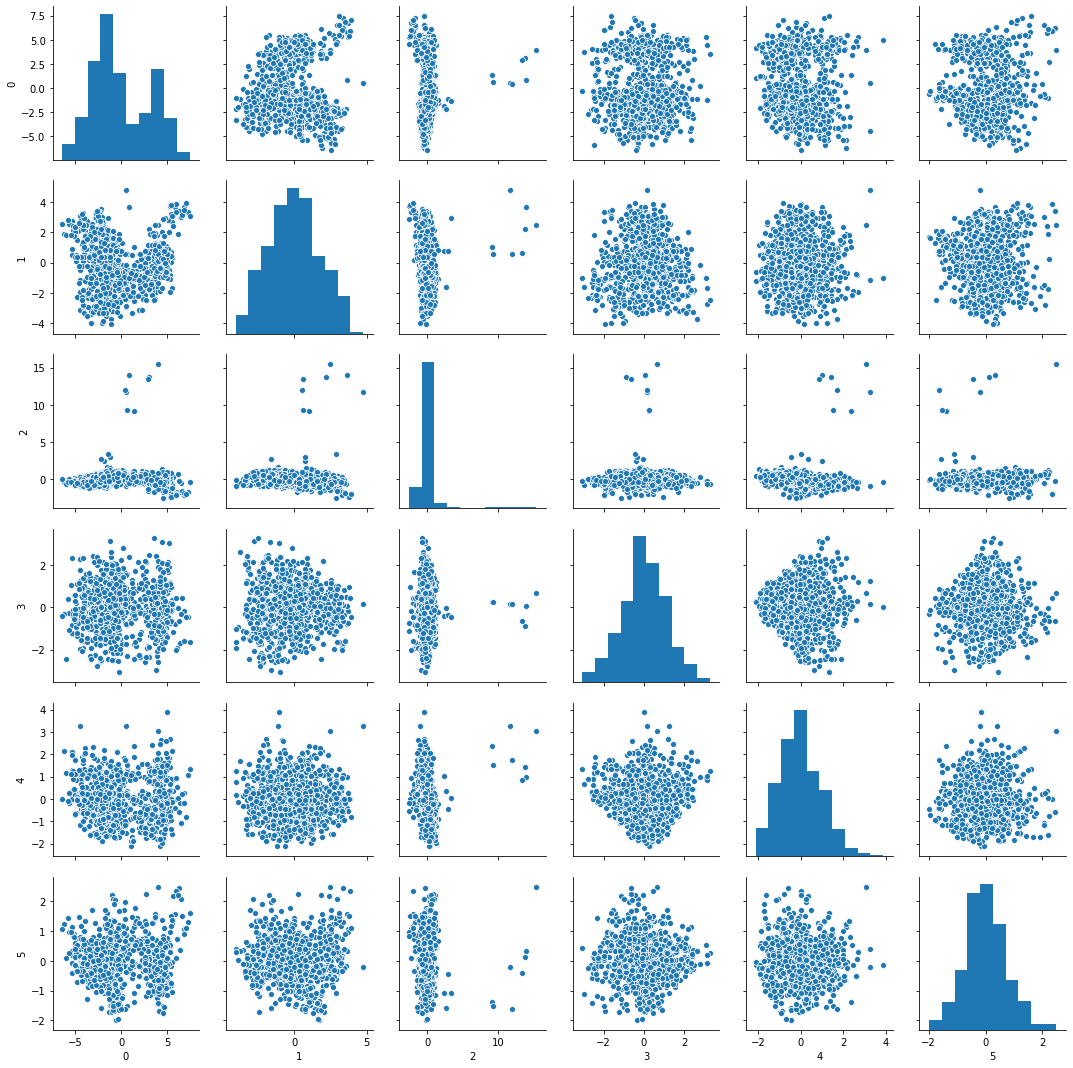

In [169]:
sns.pairplot(pd.DataFrame(Xpca2))

In [172]:
#FIT SVM MODEL

In [184]:
#Split the data into train and test set. test set size = 30% of the original combined data.
xTrain, xTest, yTrain, yTest = train_test_split(XScaled, Y, test_size = 0.3, random_state = 1)

In [185]:
svc1Model = SVC(C= .1, kernel='linear', gamma= 'auto')
svc1Model.fit(xTrain, yTrain)
svc1YPredict = svc1Model.predict(xTest)

C:\Users\Sarvesh Chandra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [186]:
# check the accuracy
trainAccuracy1 = svc1Model.score(xTrain, yTrain)
print('Train accuracy without PCA: ', trainAccuracy1)
testAccuracy1 = svc1Model.score(xTest, yTest)
print('Test accuracy without PCA: ', testAccuracy1)

Train accuracy without PCA:  0.9290540540540541
Test accuracy without PCA:  0.9291338582677166


In [187]:
#Using Xpca2 dataset.
xTrain, xTest, yTrain, yTest = train_test_split(Xpca2, Y, test_size = 0.3, random_state = 1)

In [188]:
svc2Model = SVC(C= .1, kernel='linear', gamma= 'auto')
svc2Model.fit(xTrain, yTrain)
svc2YPredict = svc2Model.predict(xTest)

C:\Users\Sarvesh Chandra\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [189]:
# check the accuracy
trainAccuracy2 = svc2Model.score(xTrain, yTrain)
print('Train accuracy with PCA: ', trainAccuracy2)
testAccuracy2 = svc2Model.score(xTest, yTest)
print('Test accuracy with PCA: ', testAccuracy2)

Train accuracy with PCA:  0.7905405405405406
Test accuracy with PCA:  0.7834645669291339
